In [1]:
# Import all required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ad_data = pd.read_csv('advertising_click.csv')

In [3]:
ad_data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

# Domain Analysis of this dataset
Feature Name	

1.Daily Time Spent on Site --> Time spent on the website (in minutes).

2.Age	                   --> Age of the user.

3.Area Income	           --> Average income of the user’s geographical area.

4.Daily Internet Usage	   --> Average internet usage (minutes per day)

5.Ad Topic Line	           --> The title of the ad shown to the user

6.City                     --> The city where the user is located

7.Male	                   --> Whether the user is male (1) or female (0)

8.Country                  --> The country where the user is located

9.Timestamp	               --> The exact date and time of the ad impression

10.Clicked on Ad	       --> Target variable (1 = Clicked, 0 = Not Clicked)

In [4]:
#Basic Check
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [5]:
ad_data.tail()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                            Ad Topic Line           City  Male  \
995         Fundamental modular algorithm      Duffystad     1   
996       Grass-roots cohesive monitoring    New Darlene     1   
997          Expanded intangible solution  South Jessica     1   
998  Proactive bandwidth-monitored policy    West Steven     0   
999       Virtual 5thgeneration emulation    Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


# This is data set there is not null value 

In [7]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

# insight
* Daily user can spent time on site range between 65 - 91.
* user can enter whose age between 36 - 61. - it most target user - here all are adult user no one can child
* 48% male hai jo daily time spent karte hai
  

# Data cleaning

In [8]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# There is no null value now go to next step to eda

# Univariant analysis 
* Age
* City
* Male
* Country 


<Axes: xlabel='Age', ylabel='Count'>

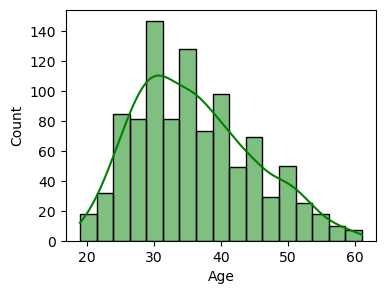

In [9]:
plt.figure(figsize=(4,3))
sns.histplot(x=ad_data["Age"],kde=True,color="green")

# Insight 
* Most 30 age of peple Daily Time Spent on Site - it most target

<Axes: xlabel='Male', ylabel='Count'>

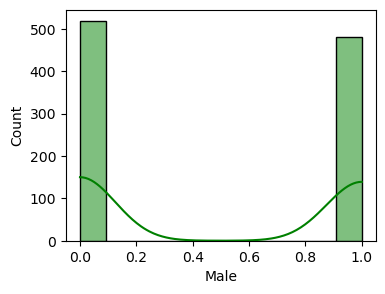

In [10]:
# Gender
plt.figure(figsize=(4,3))# canvas Size
sns.histplot(x=ad_data.Male,kde=True,color="green")

# Insight
* Female is more than the male

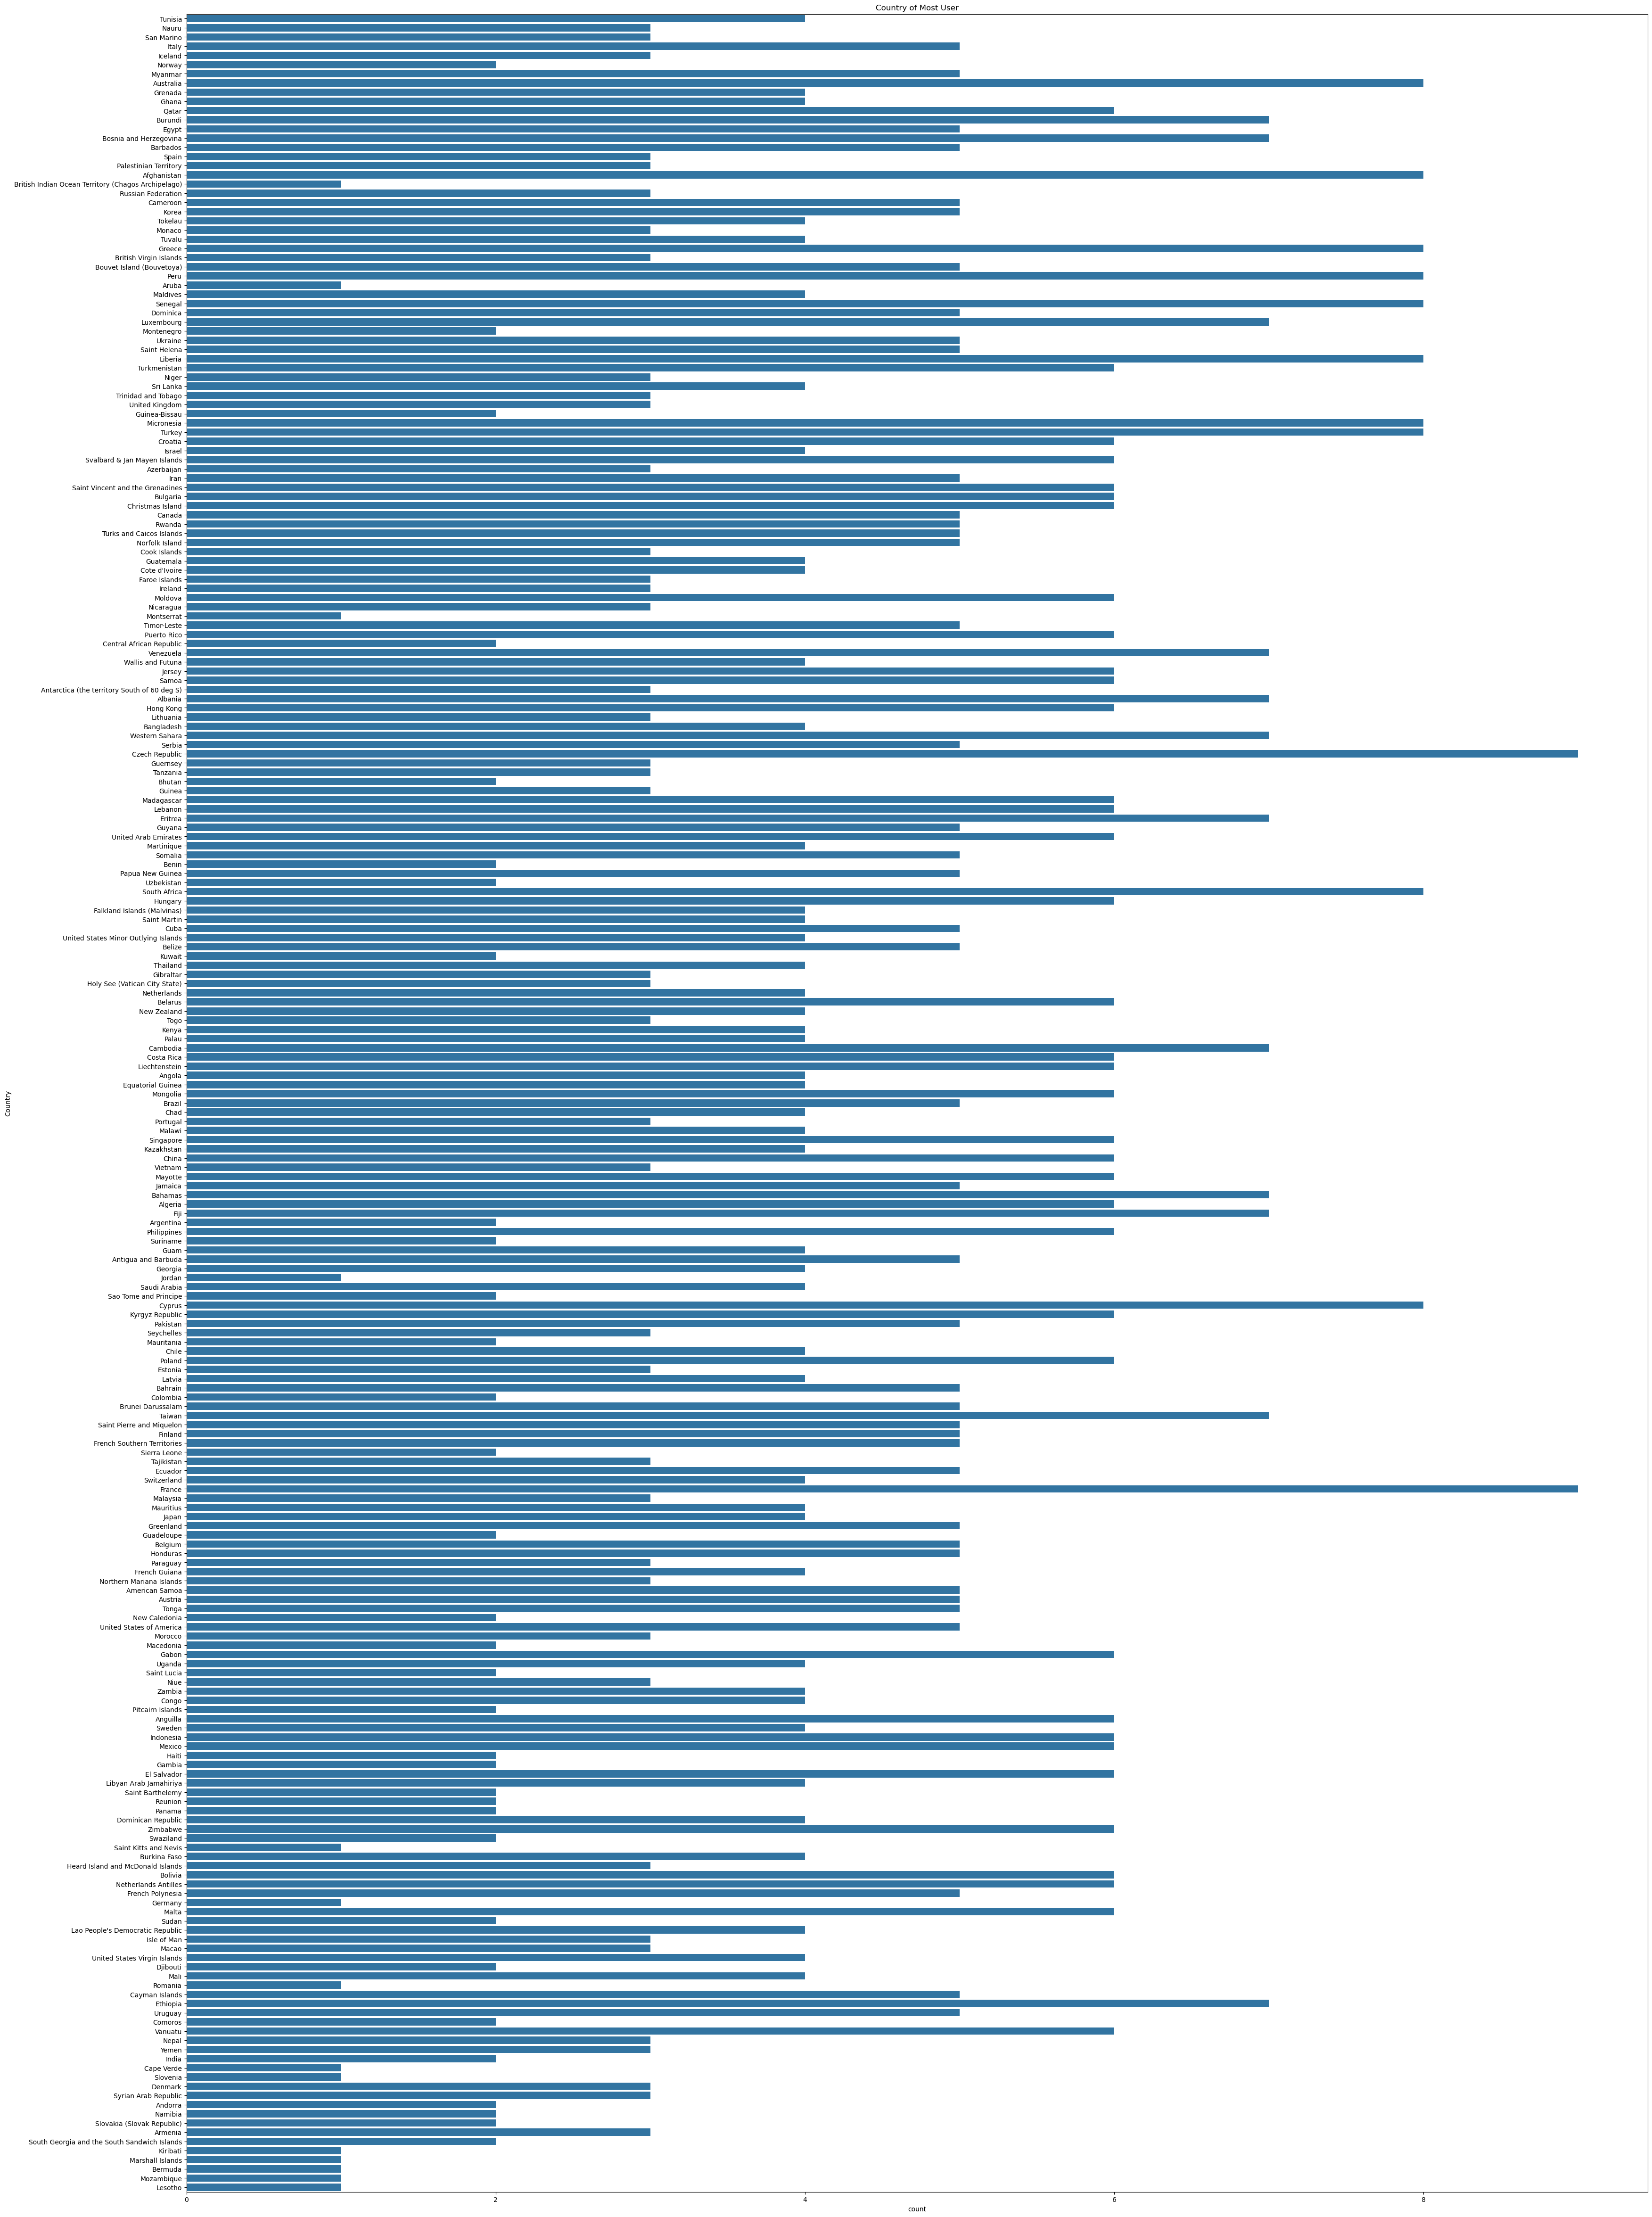

In [11]:
plt.figure(figsize=(40,60))# canvas Size
sns.countplot(ad_data.Country)
plt.title("Country of Most User")
plt.show()

# Insight
* Intalic have most User

In [12]:
# City
plt.figure(figsize=(50,250))# canvas Size
sns.countplot(ad_data.City)
plt.title("City of Most User")
plt.show()

In [13]:
# Bivariant Analysis
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [14]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

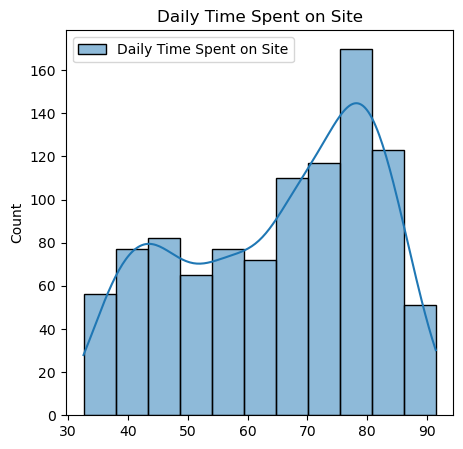

In [15]:
x = ad_data[["Daily Time Spent on Site"]]
plt.figure(figsize=(5,5))# canvas Size
sns.histplot(x,kde=True,color = "green")
plt.title("Daily Time Spent on Site")
plt.show()

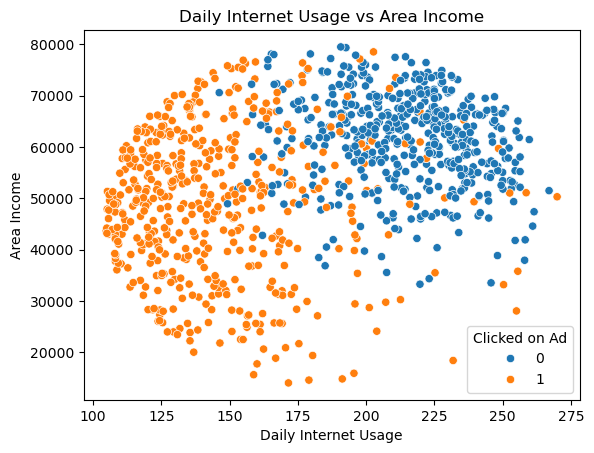

In [16]:
# Daliy Spent on site Vs Area Income
sns.scatterplot(x="Daily Internet Usage", y="Area Income", hue="Clicked on Ad", data=ad_data)
plt.title("Daily Internet Usage vs Area Income")
plt.show()

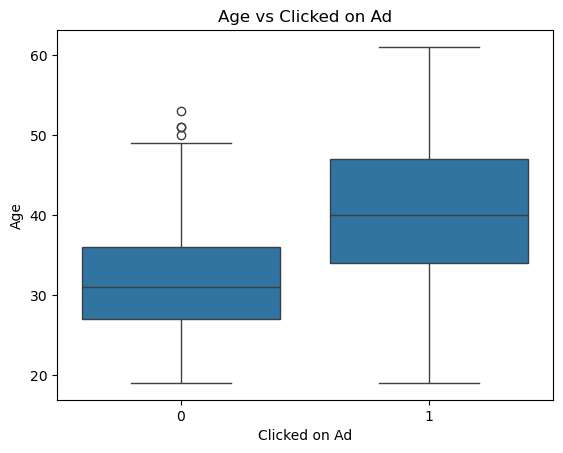

In [17]:
sns.boxplot(x='Clicked on Ad', y='Age', data=ad_data)
plt.title("Age vs Clicked on Ad")
plt.show()

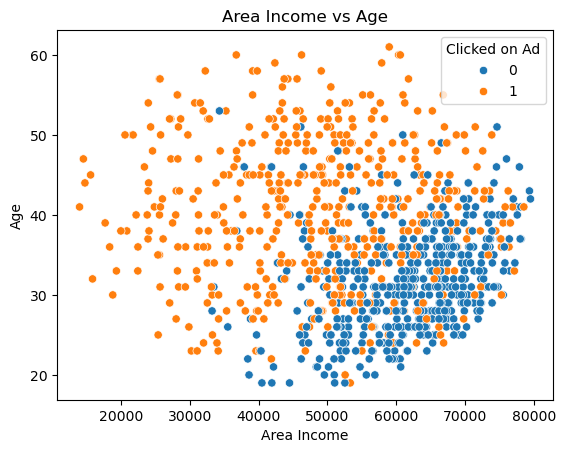

In [18]:
# Area Income vs Age
sns.scatterplot(x="Area Income", y="Age", hue="Clicked on Ad", data=ad_data)
plt.title("Area Income vs Age")
plt.show()

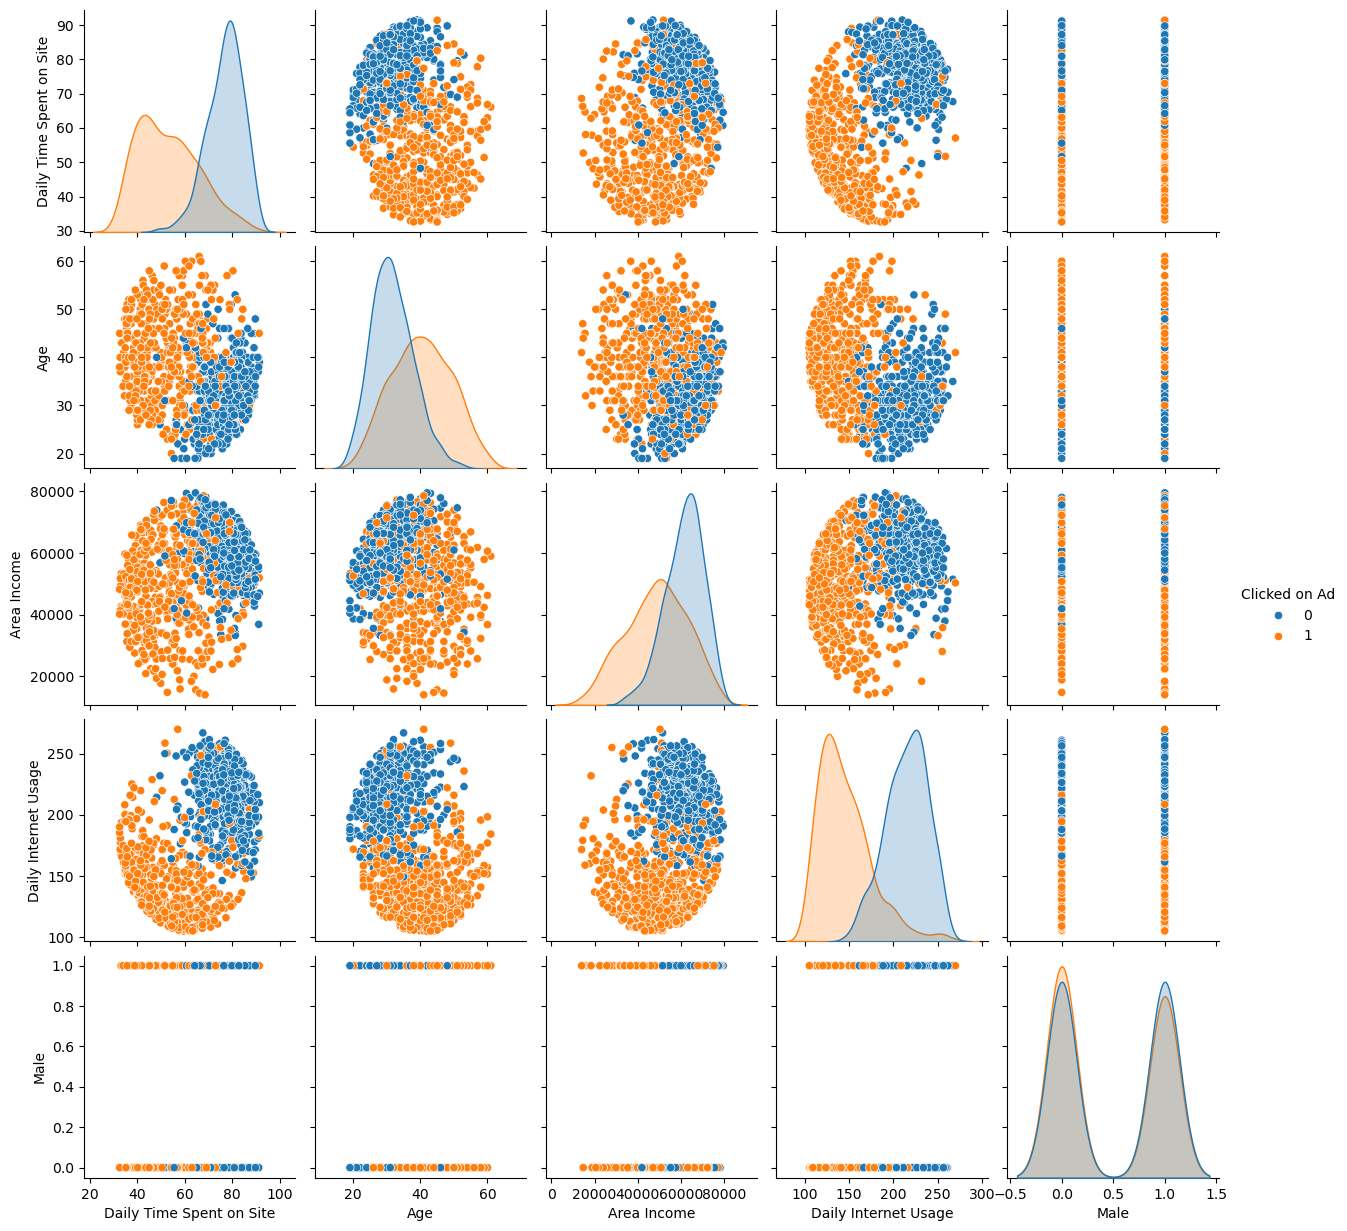

In [19]:
sns.pairplot(ad_data, hue='Clicked on Ad')

# Insight
* Insight: Higher-income people might ignore ads more, while lower-income groups might be more engaged.

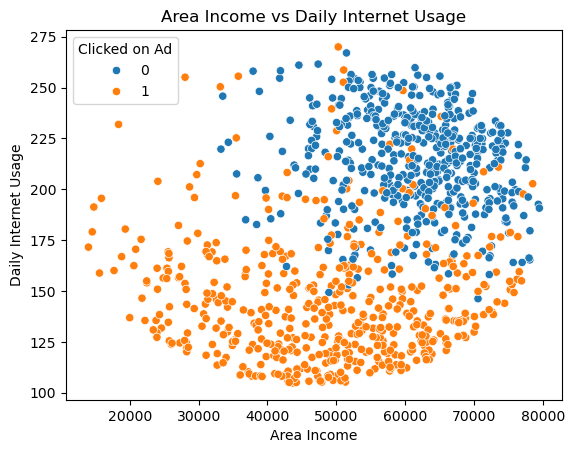

In [20]:
# Area Icnome vs Daily internet usage
sns.scatterplot(x="Area Income", y="Daily Internet Usage", hue="Clicked on Ad", data=ad_data)
plt.title("Area Income vs Daily Internet Usage")
plt.show()

In [21]:
# Data Precosseing
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [22]:
ad_data.City.value_counts

<bound method IndexOpsMixin.value_counts of 0         Wrightburgh
1           West Jodi
2            Davidton
3      West Terrifurt
4        South Manuel
            ...      
995         Duffystad
996       New Darlene
997     South Jessica
998       West Steven
999       Ronniemouth
Name: City, Length: 1000, dtype: object>

In [23]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

# Data Preprocessing:
* missing null interpretion
* outlier Detection and replace with central tendency
* Feature Scaling

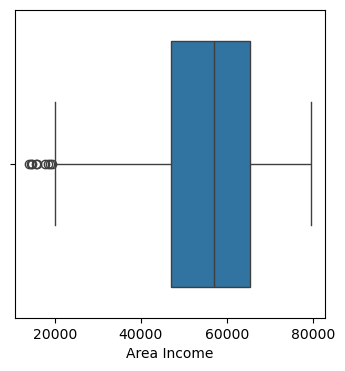

In [24]:
# Outlier Detection : 
plt.figure(figsize=(4,4))
sns.boxplot(x="Area Income",data=ad_data)
plt.show()

In [25]:
ad_data["Area Income"]

0      61833.90
1      68441.85
2      59785.94
3      54806.18
4      73889.99
         ...   
995    71384.57
996    67782.17
997    42415.72
998    41920.79
999    29875.80
Name: Area Income, Length: 1000, dtype: float64

In [26]:
ad_data.loc[ad_data["Area Income"] < 20000,"Area Income"]

135    17709.98
389    19991.72
410    19345.36
510    18819.34
640    15598.29
665    15879.10
692    14548.06
768    13996.50
778    14775.50
952    18368.57
Name: Area Income, dtype: float64

In [27]:
ad_data["Area Income"].median()

57012.3

In [28]:
ad_data.loc[ad_data["Area Income"] < 20000,"Area Income"] = ad_data["Area Income"].median()

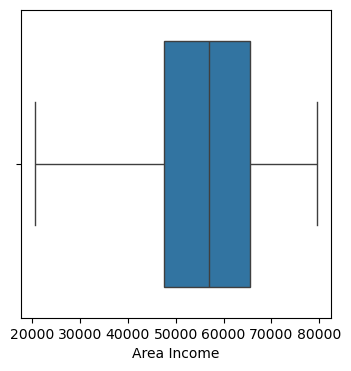

In [29]:
plt.figure(figsize=(4,4))
sns.boxplot(x="Area Income",data=ad_data)
plt.show()

# interquantile

In [30]:
Q1 = ad_data["Area Income"].quantile(0.25)
Q3 = ad_data["Area Income"].quantile(0.75)

IQR = Q3-Q1

LB = Q1-1.5*IQR
UB = Q3+1.5*IQR

In [31]:
print("IQR:",IQR)
print("Q1:",Q1)
print("Q3:",Q3)
print("LB:",LB)
print("UB:",UB)

IQR: 17975.847499999996
Q1: 47494.7875
Q3: 65470.634999999995
LB: 20531.016250000004
UB: 92434.40624999999


In [32]:
ad_data.loc[ad_data["Area Income"] < LB,"Area Income"] = ad_data["Area Income"].median()

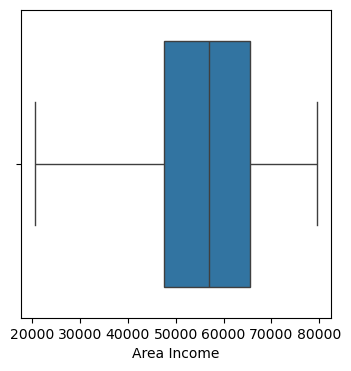

In [33]:
plt.figure(figsize=(4,4))
sns.boxplot(x="Area Income",data=ad_data)
plt.show()

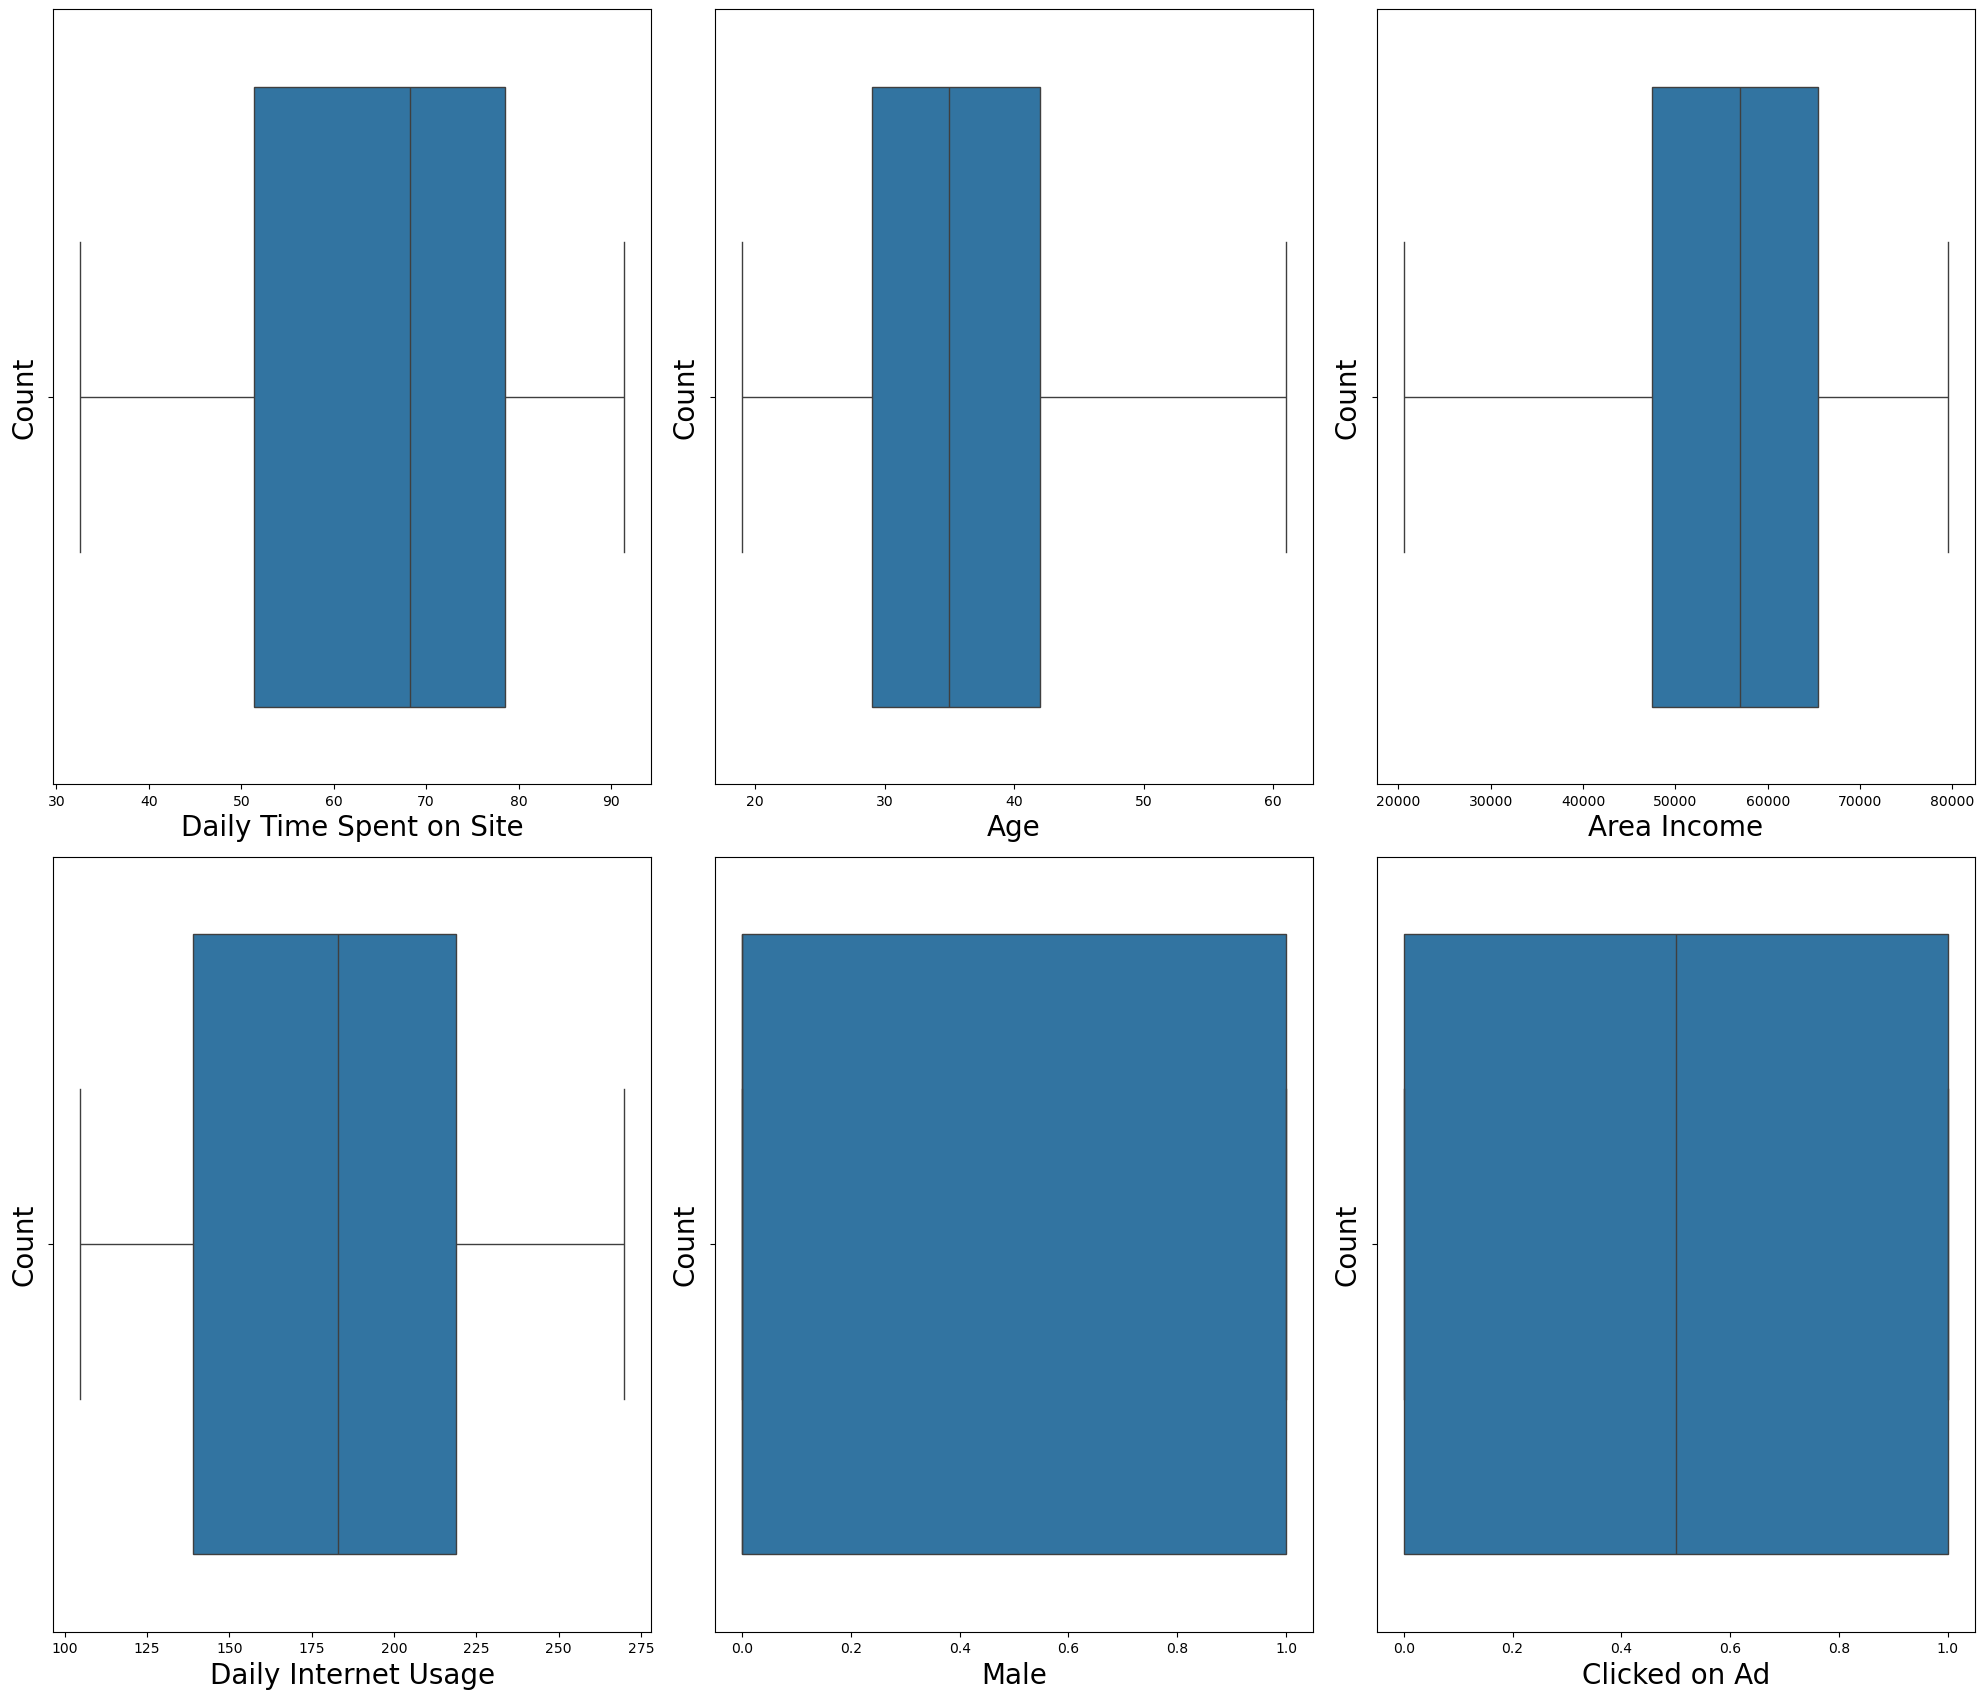

In [34]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
ad_data1 = ad_data.drop(columns =["City","Country","Ad Topic Line","Timestamp"])
for column in ad_data1:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(x = ad_data1[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber = plotnumber+1
plt.tight_layout()

In [35]:
ad_data1 = ad_data.drop(columns =["City","Country"])

In [36]:
ad_data1

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line  Male            Timestamp  \
0       Cloned 5thgeneration orchestration     0  2016-03-27 00:53:11   
1       Monitored national standardization     1  2016-04-04 01:39:02   
2         Organic bottom-line service-desk     0  2016-03-13 20:35:42   
3    Triple-buffered reciprocal time-frame     1  2016-01-10 02:31:19   
4            Robust logistical utilization     0  2016-06-03 03:36:18   
..                                     ...   ...                  ...   
995          Fundamental modular algorithm     1  2016-02-11 21:49:00   
996        Grass-roots cohesive monitoring     1  2016-04-22 02:07:01   
997           Expanded intangible solution     1  2016-02-01 17:24:57   
998   Proactive bandwidth-monitored policy     0  2016-03-24 02:35:54   
999        Virtual 5thgeneration emulation     0  2016-06-03 21:43:21   

     Clicked on Ad  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
995              1  
996              1  
997              1  
998              0  
999              1  

[1000 rows x 8 columns]

# all Detect the Outlier and replace it

# Feature Scaling
* On apply the Continous data

In [37]:
ad_data1 = ad_data.drop(columns =["City","Country","Ad Topic Line","Timestamp","Clicked on Ad"])

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_data = scaler.fit_transform(ad_data1)

In [39]:
scale_data

array([[0.61788203, 0.38095238, 0.7002826 , 0.916031  , 0.        ],
       [0.80962094, 0.28571429, 0.81248751, 0.53874561, 1.        ],
       [0.62672106, 0.16666667, 0.66550765, 0.7974331 , 0.        ],
       ...,
       [0.32347442, 0.76190476, 0.37055628, 0.09438189, 1.        ],
       [0.39010709, 0.        , 0.36215222, 0.50351132, 0.        ],
       [0.2109468 , 0.16666667, 0.1576248 , 0.4453929 , 0.        ]])

In [40]:
data=pd.DataFrame(scale_data,columns=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male'])

In [41]:
data

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                    0.617882  0.380952     0.700283              0.916031   
1                    0.809621  0.285714     0.812488              0.538746   
2                    0.626721  0.166667     0.665508              0.797433   
3                    0.706272  0.238095     0.580950              0.854280   
4                    0.608023  0.380952     0.904999              0.731323   
..                        ...       ...          ...                   ...   
995                  0.686215  0.261905     0.862456              0.628405   
996                  0.317865  0.619048     0.801286              0.179441   
997                  0.323474  0.761905     0.370556              0.094382   
998                  0.390107  0.000000     0.362152              0.503511   
999                  0.210947  0.166667     0.157625              0.445393   

     Male  
0     0.0  
1     1.0  
2     0.0  
3     1.0  
4     0.0  
..    ...  
995   1.0  
996   1.0  
997   1.0  
998   0.0  
999   0.0  

[1000 rows x 5 columns]

In [42]:
target = ad_data["Clicked on Ad"]

In [43]:
target

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [44]:
data_final = pd.concat([data,target],axis =1)
data_final

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                    0.617882  0.380952     0.700283              0.916031   
1                    0.809621  0.285714     0.812488              0.538746   
2                    0.626721  0.166667     0.665508              0.797433   
3                    0.706272  0.238095     0.580950              0.854280   
4                    0.608023  0.380952     0.904999              0.731323   
..                        ...       ...          ...                   ...   
995                  0.686215  0.261905     0.862456              0.628405   
996                  0.317865  0.619048     0.801286              0.179441   
997                  0.323474  0.761905     0.370556              0.094382   
998                  0.390107  0.000000     0.362152              0.503511   
999                  0.210947  0.166667     0.157625              0.445393   

     Male  Clicked on Ad  
0     0.0              0  
1     1.0              0  
2     0.0              0  
3     1.0              0  
4     0.0              0  
..    ...            ...  
995   1.0              1  
996   1.0              1  
997   1.0              1  
998   0.0              0  
999   0.0              1  

[1000 rows x 6 columns]

# Feature Selection

In [45]:
data_final.corr()

Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.313456   
Age                                      -0.331513  1.000000    -0.181026   
Area Income                               0.313456 -0.181026     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.350348   
Male                                     -0.018951 -0.021044     0.009643   
Clicked on Ad                            -0.748117  0.492531    -0.465758   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.350348  0.009643      -0.465758  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027  
Clicked on Ad                        -0.786539 -0.038027       1.000000

<Axes: >

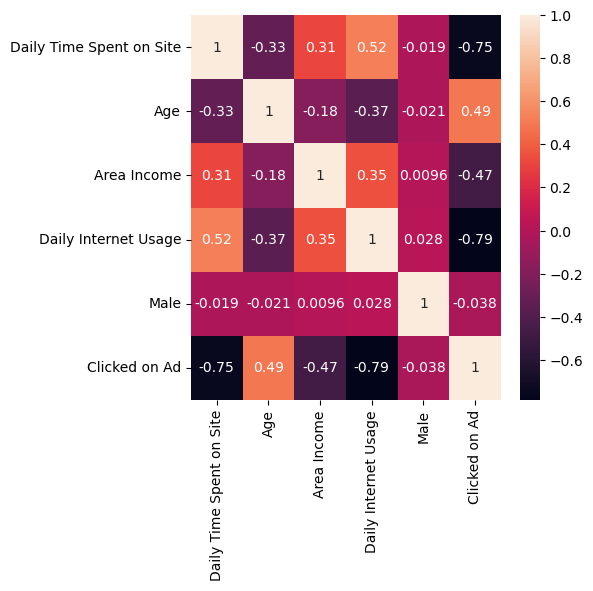

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(data_final.corr(),annot=True)

In [47]:
# Model Creation 
X = data_final.drop(columns=["Clicked on Ad"])
Y = data_final["Clicked on Ad"]

In [48]:
X

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                    0.617882  0.380952     0.700283              0.916031   
1                    0.809621  0.285714     0.812488              0.538746   
2                    0.626721  0.166667     0.665508              0.797433   
3                    0.706272  0.238095     0.580950              0.854280   
4                    0.608023  0.380952     0.904999              0.731323   
..                        ...       ...          ...                   ...   
995                  0.686215  0.261905     0.862456              0.628405   
996                  0.317865  0.619048     0.801286              0.179441   
997                  0.323474  0.761905     0.370556              0.094382   
998                  0.390107  0.000000     0.362152              0.503511   
999                  0.210947  0.166667     0.157625              0.445393   

     Male  
0     0.0  
1     1.0  
2     0.0  
3     1.0  
4     0.0  
..    ...  
995   1.0  
996   1.0  
997   1.0  
998   0.0  
999   0.0  

[1000 rows x 5 columns]

In [49]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=33,test_size = 0.2,)

In [51]:
X_train

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
866                  0.917559  0.309524     0.671720              0.551822   
909                  0.724800  0.119048     0.537595              0.736833   
640                  0.544450  0.619048     0.618410              0.327037   
582                  0.126466  0.190476     0.467058              0.343867   
516                  0.887472  0.309524     0.385565              0.781874   
..                        ...       ...          ...                   ...   
658                  0.855856  0.476190     0.835646              0.584272   
578                  0.582866  0.095238     0.744433              0.626347   
728                  0.969913  0.357143     0.546928              0.402288   
391                  0.805201  0.595238     0.846570              0.673326   
20                   0.758457  0.261905     0.750687              0.724422   

     Male  
866   1.0  
909   0.0  
640   1.0  
582   0.0  
516   1.0  
..    ...  
658   0.0  
578   1.0  
728   1.0  
391   0.0  
20    1.0  

[800 rows x 5 columns]

In [52]:
X_test

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
286                  0.397926  0.166667     0.437179              0.136094   
402                  0.114567  0.571429     0.180380              0.267284   
253                  0.229135  0.261905     0.784350              0.362332   
4                    0.608023  0.380952     0.904999              0.731323   
372                  0.796192  0.166667     0.683500              0.617569   
..                        ...       ...          ...                   ...   
358                  0.319225  0.952381     0.369652              0.325584   
626                  0.903791  0.190476     0.537744              0.526698   
207                  0.875064  0.261905     0.708815              0.499939   
714                  0.657318  0.047619     0.501848              0.673508   
122                  0.765766  0.190476     0.724751              0.653893   

     Male  
286   0.0  
402   0.0  
253   1.0  
4     0.0  
372   0.0  
..    ...  
358   0.0  
626   1.0  
207   1.0  
714   1.0  
122   0.0  

[200 rows x 5 columns]

In [53]:
y_train

866    0
909    0
640    1
582    1
516    0
      ..
658    0
578    0
728    0
391    0
20     0
Name: Clicked on Ad, Length: 800, dtype: int64

In [54]:
y_test

286    1
402    1
253    1
4      0
372    0
      ..
358    1
626    0
207    0
714    0
122    0
Name: Clicked on Ad, Length: 200, dtype: int64

# Apply the logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression
LeR = LogisticRegression()
LeR.fit(X_train,y_train)

LogisticRegression()

In [56]:
X_test

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
286                  0.397926  0.166667     0.437179              0.136094   
402                  0.114567  0.571429     0.180380              0.267284   
253                  0.229135  0.261905     0.784350              0.362332   
4                    0.608023  0.380952     0.904999              0.731323   
372                  0.796192  0.166667     0.683500              0.617569   
..                        ...       ...          ...                   ...   
358                  0.319225  0.952381     0.369652              0.325584   
626                  0.903791  0.190476     0.537744              0.526698   
207                  0.875064  0.261905     0.708815              0.499939   
714                  0.657318  0.047619     0.501848              0.673508   
122                  0.765766  0.190476     0.724751              0.653893   

     Male  
286   0.0  
402   0.0  
253   1.0  
4     0.0  
372   0.0  
..    ...  
358   0.0  
626   1.0  
207   1.0  
714   1.0  
122   0.0  

[200 rows x 5 columns]

In [57]:
y_pred = LeR.predict(X_test)

In [58]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [59]:
y_test

286    1
402    1
253    1
4      0
372    0
      ..
358    1
626    0
207    0
714    0
122    0
Name: Clicked on Ad, Length: 200, dtype: int64

# Model Evalution 

# Classification Metrices :
* Confusion Matrices
* Accuracy Score
* Precision Score
* Recall Score
* F1 Score

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,classification_report

In [61]:
y_test

286    1
402    1
253    1
4      0
372    0
      ..
358    1
626    0
207    0
714    0
122    0
Name: Clicked on Ad, Length: 200, dtype: int64

In [62]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [63]:
confusion_matrix(y_test,y_pred)

array([[99,  2],
       [ 7, 92]], dtype=int64)

In [64]:
recall_score(y_test,y_pred)

0.9292929292929293

In [65]:
f1_score(y_test,y_pred)

0.9533678756476683

In [66]:
precision_score(y_test,y_pred)

0.9787234042553191

In [67]:
accuracy_score(y_test,y_pred)

0.955

# linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [69]:
Lr.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred_lr = Lr.predict(X_test)
y_pred_lr

array([ 0.87191288,  1.20913818,  0.68995651,  0.11165709,  0.06294169,
        0.69149446,  1.11764208,  0.71995645,  0.85359878,  0.40593938,
       -0.00592134,  0.11164399,  0.82617824,  1.10426273,  1.09227691,
        0.98236735, -0.06738662,  0.97667549,  1.19193012,  1.03168004,
        0.90582132,  0.50106813,  0.90069954,  0.97750172,  0.0946598 ,
       -0.03752074,  0.05966431,  0.07480611,  0.06200333,  0.46610947,
        0.90930206,  1.24927561, -0.02438953,  0.96969982,  1.11814864,
        0.00307908,  0.96045964,  1.20678381,  1.05331679, -0.05404056,
        1.13140285,  1.03905566,  0.1835151 ,  0.56089634,  0.70955167,
        0.04308839,  0.0227741 ,  1.05109656,  0.90368957,  0.16431108,
       -0.01053266,  0.01296135,  0.38597625,  0.00608749,  0.21987514,
        0.50985901,  1.07430102,  0.72183926,  1.078782  ,  0.04353226,
        1.19413343, -0.07206957,  0.08176207,  0.00927713,  1.01002454,
       -0.07036325,  0.15505774,  0.44423126, -0.05681568,  0.91

In [72]:
y_test

286    1
402    1
253    1
4      0
372    0
      ..
358    1
626    0
207    0
714    0
122    0
Name: Clicked on Ad, Length: 200, dtype: int64

# Regression Matric to check the performance of the model 

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [81]:
mean_absolute_error(y_pred_lr,y_test)

0.1559453396977429

In [82]:
mean_squared_error(y_pred_lr,y_test)

0.052990323149080865

In [83]:
r2_score(y_pred_lr,y_test)

0.7354981633891985

In [84]:
root_mean_squared_error(y_pred_lr,y_test)

0.23019627092783423

# r2_score is 73 % then model is good worked